# Managing Consumer Complaints Data Using Pandas

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [2]:
complaints = pd.read_csv('complaints_dec_2014.csv')

In [3]:
complaints['date'] = pd.to_datetime(complaints.pop('Date received'), format='%m/%d/%Y')
complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,date
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN,2014-12-31
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN,2014-12-31
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN,2014-12-31
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN,2014-12-31
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN,2014-12-31


##### Sample DataFrame with Parsed Date
After reading in the csv file, I changed the format of the date data I wanted to keep and printed out a sample.

In [4]:
complaints = complaints[['Complaint ID', 'date', 'Product', 'Sub-product', 'Issue', 'State', 'ZIP code', 'Company', 'Company response', 'Consumer disputed?']]
complaints = complaints.rename(columns={'Complaint ID': 'id', 'Product': 'product', 'Sub-product': 'subproduct', 'Issue': 'issue', 'State': 'state', 'ZIP code': 'zip', 'Company': 'company', 'Company response': 'response', 'Consumer disputed?': 'disputed'})
complaints.head()

,id,date,product,subproduct,issue,state,zip,company,response,disputed
0,1177167,2014-12-31,Debt collection,NaN,Cont'd attempts collect debt not owed,TX,77068.0,Ad Astra Recovery Services Inc,Closed with explanation,NaN
1,1177166,2014-12-31,Debt collection,NaN,Cont'd attempts collect debt not owed,TX,77068.0,"Unique Management Services, Inc",Closed with explanation,NaN
2,1177165,2014-12-31,Debt collection,NaN,Cont'd attempts collect debt not owed,TX,77068.0,"CL Holdings, LLC",Closed with monetary relief,NaN
3,1177164,2014-12-31,Debt collection,NaN,Cont'd attempts collect debt not owed,TX,77068.0,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,NaN
4,1177163,2014-12-31,Debt collection,NaN,Cont'd attempts collect debt not owed,TX,77068.0,"Enhanced Acquisitions, LLC",Closed with explanation,NaN


##### Sample of New DataFrame
I narrowed the data frame down to the columns I wanted to maniuplate.

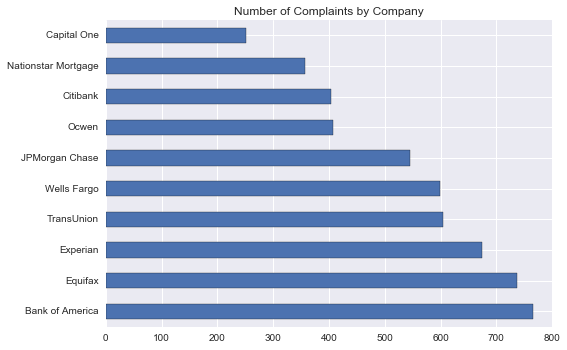

In [5]:
company = complaints['company'].value_counts()
company = company[:10]
company.plot(kind='barh')
plt.title('Number of Complaints by Company')
plt.show()

### Bank of America is the Worst
At over 800 consumer complaints, Bank of America received the most complaints for the month of December 2014.

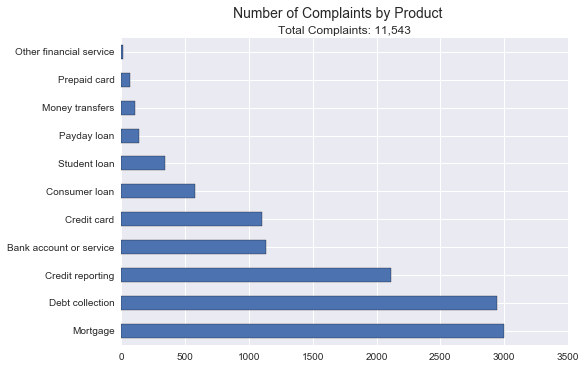

In [6]:
complaints['product'].value_counts().plot(kind='barh')
plt.suptitle('Number of Complaints by Product', fontsize=14)
plt.title('Total Complaints: 11,543')
plt.show()

### Debt Sucks

More than half of the total complaints are about morgatges or debt collection. 

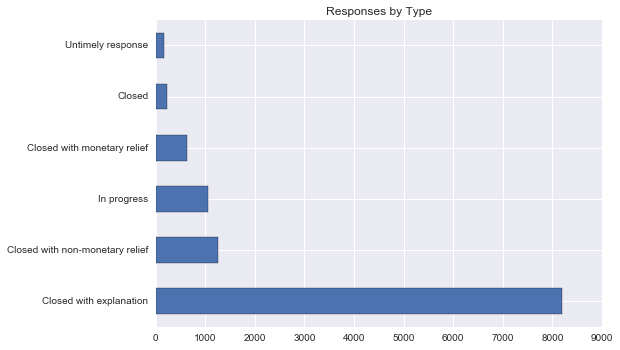

In [7]:
complaints['response'].value_counts(dropna=False).plot(kind='barh')
plt.title('Responses by Type')
plt.show()

### Explainations Abound
Most of the complaints received through the CFPB are resolved with only a simple explanation. 643 complaints were resolved by giving the consumer money.

I tried to to include NaN values to show the whole data set of complaint, but I think there is a bug in Series.value_counts that doesn't care about my dropna=False keyword. See <https://github.com/pydata/pandas/issues/9443>.

In [16]:
complaints['weekday'] = complaints.date.map(lambda d: d.weekday())
complaints.head()

,id,date,product,subproduct,issue,state,zip,company,response,disputed,weekday
0,1177167,2014-12-31,Debt collection,NaN,Cont'd attempts collect debt not owed,TX,77068.0,Ad Astra Recovery Services Inc,Closed with explanation,NaN,2
1,1177166,2014-12-31,Debt collection,NaN,Cont'd attempts collect debt not owed,TX,77068.0,"Unique Management Services, Inc",Closed with explanation,NaN,2
2,1177165,2014-12-31,Debt collection,NaN,Cont'd attempts collect debt not owed,TX,77068.0,"CL Holdings, LLC",Closed with monetary relief,NaN,2
3,1177164,2014-12-31,Debt collection,NaN,Cont'd attempts collect debt not owed,TX,77068.0,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,NaN,2
4,1177163,2014-12-31,Debt collection,NaN,Cont'd attempts collect debt not owed,TX,77068.0,"Enhanced Acquisitions, LLC",Closed with explanation,NaN,2


##### Day of the Week
Here I added a weekday column which tracks the day of the week for each date-time object.

[508.80000000000001, 516.0, 457.80000000000001, 408.5, 361.5, 135.75, 126.75]


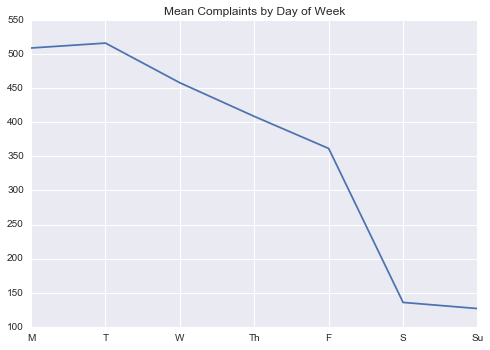

In [89]:
date_occurence = complaints.groupby(['weekday', 'date']).size()
means = [date_occurence[i].mean() for i in range(7)]
print(means)
x1 = ['M', 'T', 'W', 'Th', 'F', 'S', 'Su']
plt.plot(means)
plt.xticks(range(len(x1)), x1)
plt.title('Mean Complaints by Day of Week')
plt.show()

### Day-to-Day Complaints
Tuesday is the most popular day to complain. The CFPB received an average of 516 calls every Tuesday in December 2014. They receive 75% less calls on weekend days.

In [90]:
pop_est = pd.read_csv('pop_est_2014.csv',header=3, skip_footer=7, index_col=0)
pop_est = pop_est[['2014']]
pop_est.head()

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,2014
United States,"318,857,056"
Northeast,"56,152,333"
Midwest,"67,745,108"
South,"119,771,934"
West,"75,187,681"
